#                                    Лабораторная работа №7

## Pandas: Обработка данных

**1.** Описание исходных данных приведено тут: https://www.kaggle.com/janiobachmann/math-students. Вам предложены измененные данные.

In [25]:
# Открываем таблицу с данными об учениках 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = pd.read_csv('math_students.csv', delimiter=',')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
3,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15


Проанализируйте данные - выведите всю возможную информацию, типы данных, распределение по каждому столбцу. 

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      423 non-null    object
 1   sex         423 non-null    object
 2   age         423 non-null    int64 
 3   address     423 non-null    object
 4   famsize     423 non-null    object
 5   Pstatus     423 non-null    object
 6   Medu        423 non-null    int64 
 7   Fedu        423 non-null    int64 
 8   Mjob        420 non-null    object
 9   Fjob        423 non-null    object
 10  reason      422 non-null    object
 11  guardian    421 non-null    object
 12  traveltime  423 non-null    int64 
 13  studytime   423 non-null    int64 
 14  failures    423 non-null    int64 
 15  schoolsup   423 non-null    object
 16  famsup      421 non-null    object
 17  paid        423 non-null    object
 18  activities  423 non-null    object
 19  nursery     423 non-null    object
 20  higher    

In [27]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,16.692671,2.761229,2.539007,1.456265,2.037825,0.321513,4.803783,3.224586,3.094563,1.475177,2.281324,3.581560,5.529551,10.936170,10.742317,26.446809
std,1.284290,1.089463,1.080971,0.696880,0.833816,0.729010,17.627445,0.990074,1.110290,0.894281,1.278256,1.382813,7.819859,3.310645,3.739412,329.422317
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,366.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,6785.000000


При наличии нелогичных данных или пустых значений - постарайтесь исправить то, что можно, а при невозможности исправления, удалите соответствующие строки. Фиксируйте, какие изменения вы выполняете.

In [28]:
# Выведем строки, которые содержат пропущенные данные
filtered_data = data[data.isna().any(axis=1)]
filtered_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
222,GP,M,18,U,LE3,T,2,1,NaN,other,...,4,3,2,4,5,3,14,10,8,9
371,MS,M,17,U,GT3,T,2,3,NaN,services,...,4,4,3,1,1,3,2,11,11,10
375,MS,F,18,U,GT3,T,2,3,at_home,services,...,5,2,3,1,2,4,0,11,10,6785
393,MS,F,18,U,GT3,T,2,3,at_home,services,...,5,2,3,1,2,4,0,11,10,10
416,MS,M,17,U,GT3,T,2,3,NaN,services,...,4,4,3,1,1,3,2,11,11,10


In [61]:
# Удаление строк, содержащих пропущенные значения
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 422
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      418 non-null    object
 1   sex         418 non-null    object
 2   age         418 non-null    int64 
 3   address     418 non-null    object
 4   famsize     418 non-null    object
 5   Pstatus     418 non-null    object
 6   Medu        418 non-null    int64 
 7   Fedu        418 non-null    int64 
 8   Mjob        418 non-null    object
 9   Fjob        418 non-null    object
 10  reason      418 non-null    object
 11  guardian    418 non-null    object
 12  traveltime  418 non-null    int64 
 13  studytime   418 non-null    int64 
 14  failures    418 non-null    int64 
 15  schoolsup   418 non-null    object
 16  famsup      418 non-null    object
 17  paid        418 non-null    object
 18  activities  418 non-null    object
 19  nursery     418 non-null    object
 20  higher    

Если в таблице имеются повторяющиеся строки - удалите их.

In [29]:
#duplicate = data.duplicated()
#print(duplicate)
#data[duplicate]

# Удаляем дублированные строки
data_unique = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      423 non-null    object
 1   sex         423 non-null    object
 2   age         423 non-null    int64 
 3   address     423 non-null    object
 4   famsize     423 non-null    object
 5   Pstatus     423 non-null    object
 6   Medu        423 non-null    int64 
 7   Fedu        423 non-null    int64 
 8   Mjob        420 non-null    object
 9   Fjob        423 non-null    object
 10  reason      422 non-null    object
 11  guardian    421 non-null    object
 12  traveltime  423 non-null    int64 
 13  studytime   423 non-null    int64 
 14  failures    423 non-null    int64 
 15  schoolsup   423 non-null    object
 16  famsup      421 non-null    object
 17  paid        423 non-null    object
 18  activities  423 non-null    object
 19  nursery     423 non-null    object
 20  higher    

In [44]:
for col in data.columns:
    print(data[col].value_counts())

school
GP    366
MS     57
Name: count, dtype: int64
sex
F    223
M    199
N      1
Name: count, dtype: int64
age
17    104
16    104
15     93
18     92
19     25
20      3
22      1
21      1
Name: count, dtype: int64
address
U     328
R      91
UU      2
RR      2
Name: count, dtype: int64
famsize
GT3    303
LE3    120
Name: count, dtype: int64
Pstatus
T    378
A     43
А      2
Name: count, dtype: int64
Medu
4    142
2    112
3    105
1     61
0      3
Name: count, dtype: int64
Fedu
2    119
3    114
4    102
1     86
0      2
Name: count, dtype: int64
Mjob
other       146
services    111
teacher      67
at_home      61
health       34
healths       1
Name: count, dtype: int64
Fjob
other       229
services    123
teacher      32
at_home      20
health       18
service       1
Name: count, dtype: int64
reason
course        159
home          116
reputation    110
other          37
Name: count, dtype: int64
guardian
mother          291
father           96
other            32
fatherfat

После предобработки данных визуализируйте распределение значений всех столбцов. 

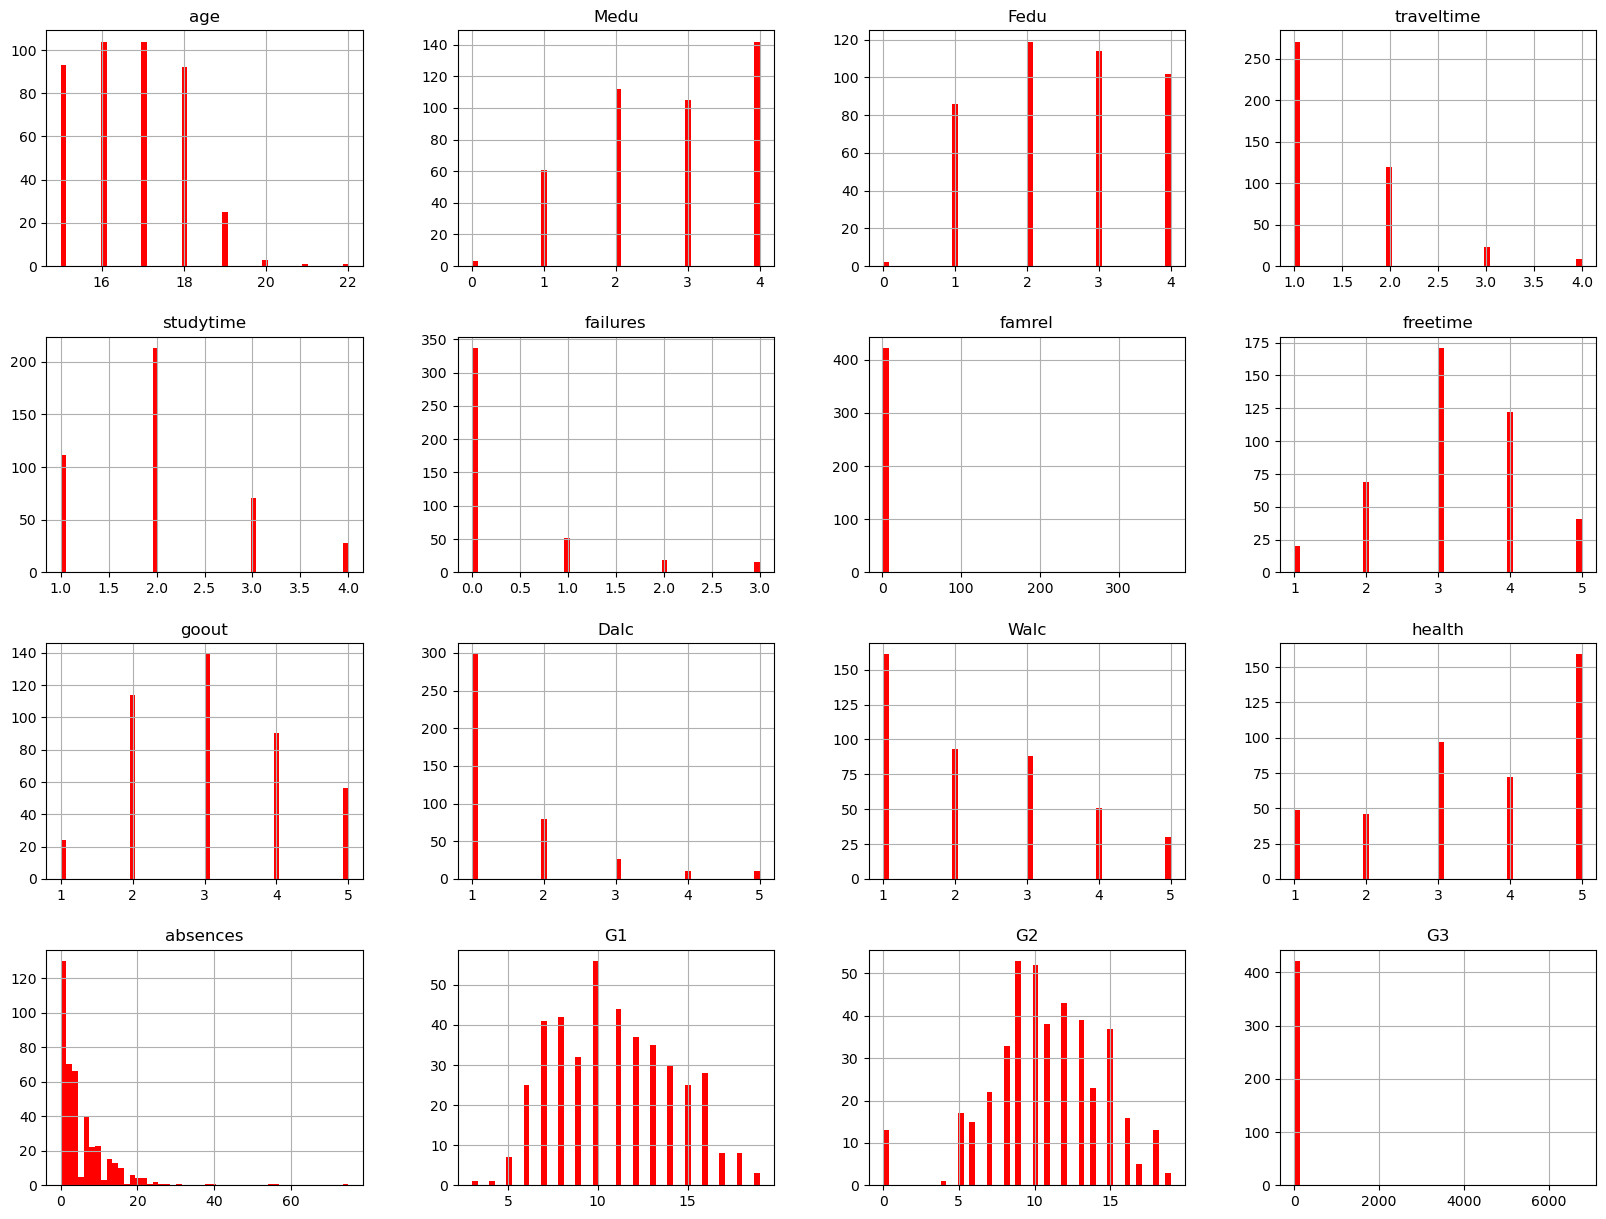

In [30]:
data.hist(bins=50, figsize=(20,15), color='r')
plt.show()

Следующие задания выполните на предобработанных данных.

* Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

In [31]:
data['reason'].value_counts()

reason
course        159
home          116
reputation    110
other          37
Name: count, dtype: int64

In [32]:
print(f'Наиболее частая причина выбора школы - {data['reason'].mode().to_list()[0]}')

Наиболее частая причина выбора школы - course


* Найдите количество студентов, у родителей (одного или обоих - рассмотрите оба варианта) которых нет никакого образования.

In [33]:
data[(data['Medu'] == 0) | (data['Fedu'] == 0)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
80,GP,M,15,U,GT3,T,4,0,teacher,other,...,3,4,3,1,1,1,8,11,11,10
133,GP,F,19,U,GT3,T,0,1,at_home,other,...,3,4,2,1,1,5,2,7,8,9
177,GP,M,16,U,GT3,T,1,0,other,other,...,4,3,2,1,1,3,2,13,15,16
265,GP,M,16,U,GT3,T,0,2,other,other,...,4,3,2,2,4,5,0,13,15,15
340,GP,F,17,U,LE3,T,0,2,at_home,at_home,...,3,3,3,2,3,2,0,16,15,15


In [34]:
print(f'Количество студентов, у которых хотя бы у одного родителя нет образования = {len(data[(data['Medu'] == 0) | (data['Fedu'] == 0)])}')

Количество студентов, у которых хотя бы у одного родителя нет образования = 5


In [35]:
data[(data['Medu'] == 0) & (data['Fedu'] == 0)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [36]:
print(f'Количество студентов, у которых у обоих родителей нет образования = {len(data[(data['Medu'] == 0) & (data['Fedu'] == 0)])}')

Количество студентов, у которых у обоих родителей нет образования = 0


* Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [37]:
df = data[data['school'] == 'MS']
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
365,MS,M,18,R,GT3,T,3,2,other,other,...,2,5,5,5,5,5,10,11,13,13
366,MS,M,19,R,GT3,T,1,1,other,services,...,5,4,4,3,3,2,8,8,7,8
367,MS,M,17,U,GT3,T,3,3,health,other,...,4,5,4,2,3,3,2,13,13,13
368,MS,M,18,U,LE3,T,1,3,at_home,service,...,4,3,3,2,3,3,7,8,7,8
369,MS,M,19,R,GT3,T,1,1,other,other,...,4,4,4,3,3,5,4,8,8,8
370,MS,M,17,R,GT3,T,4,3,services,other,...,4,5,5,1,3,2,4,13,11,11
371,MS,M,17,U,GT3,T,2,3,NaN,services,...,4,4,3,1,1,3,2,11,11,10
372,MS,F,18,U,GT3,T,3,3,services,services,...,5,3,4,1,1,5,0,10,9,9
373,MS,F,17,R,GT3,T,4,4,teacher,services,...,4,3,3,1,2,5,4,12,13,13
374,MS,F,17,U,LE3,А,3,2,services,other,...,1,2,3,1,2,5,2,12,12,11


In [38]:
print(f'Минимальный возраст учеников школы Mousinho da Silveira = {df['age'].min()}')

Минимальный возраст учеников школы Mousinho da Silveira = 17


* Найдите количество студентов, имеющих нечетное число пропусков.

In [39]:
df = data[data['absences'] % 2 == 1]
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
38,GP,M,16,R,GT3,A,4,4,other,teacher,...,2,4,3,1,1,5,7,15,16,15
41,GP,F,16,U,LE3,T,2,2,other,other,...,3,3,3,1,2,3,25,7,10,11
64,GP,M,18,R,GT3,T,4,3,teacher,services,...,5,3,2,1,2,4,9,16,15,16
98,GP,M,18,R,GT3,T,4,3,teacher,services,...,5,3,2,1,2,4,9,16,15,16
219,GP,F,16,U,GT3,A,3,1,services,other,...,2,3,3,2,2,4,5,7,7,7
225,GP,M,17,U,LE3,T,4,4,services,other,...,5,3,5,4,5,3,13,12,12,13
227,GP,M,18,U,GT3,T,2,2,services,other,...,4,4,4,2,4,5,15,6,7,8
231,GP,M,18,U,LE3,T,3,3,services,health,...,3,2,4,2,4,4,13,6,6,8
232,GP,F,17,U,GT3,T,2,3,at_home,other,...,3,3,3,1,4,3,3,7,7,8
276,GP,F,18,U,GT3,T,4,3,services,other,...,3,1,2,1,3,2,21,17,18,18


In [40]:
print(f'Количество студентов, имеющих нечетное число пропусков занятий = {len(df)}')

Количество студентов, имеющих нечетное число пропусков занятий = 43


* Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [41]:
df = data[(data['romantic'] == 'yes')]
print(f"Средняя итоговая оценка студентов, состоящих в романтических отношениях = {df['G3'].mean():.2f}")

df = data[(data['romantic'] == 'no')]
print(f"Средняя итоговая оценка студентов, не состоящих в романтических отношениях =  {df['G3'].mean():.2f}")

Средняя итоговая оценка студентов, состоящих в романтических отношениях = 56.10
Средняя итоговая оценка студентов, не состоящих в романтических отношениях =  10.82


* Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

*Примечание. В данном контексте под "большинством" подразумеваются студенты, имеющее самое частое значение пропусков. То есть в данном задании необходимо:*


* *Определить самое частое значение наличия внеклассных активностей (да или нет).*
* *Для группы студентов, соответствующей этому значению, рассмотреть значения признака «число пропусков».*
* *Для каждого значения числа пропусков посчитать, сколько студентов ему соответствует.*
* *Выбрать значение числа пропусков с наибольшим числом студентов.*



In [42]:
max_v = data['activities'].mode().to_list()[0]
print(f'Самое частое значение наличия внеклассных активностей = {max_v}')
df = data[(data['activities'] == 'yes') | (data['activities'] == 'YES')]
print(df['absences'].value_counts())
print(f'Наибольшее число студентов имеет {df['absences'].mode().to_list()[0]} пропусков занятий')


Самое частое значение наличия внеклассных активностей = yes
absences
0     56
2     41
4     33
6     17
8     16
10     9
14     8
16     4
3      4
15     3
7      3
12     3
11     2
9      2
1      2
20     2
18     2
56     1
13     1
22     1
30     1
54     1
25     1
17     1
5      1
Name: count, dtype: int64
Наибольшее число студентов имеет 0 пропусков занятий


**2.** Возьмите свой набор данных (или выберите, например, на kaggle). Выполните различные возможные операции по предобработке и первичному анализу данных.